## REGRESIÓN LOGISTICA PARA PREDICCIÓNES BANCARIAS 

Información del conjunto de datos:

Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaban en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para acceder a si el producto (depósito bancario a plazo) sería ('sí') o no ('no') suscrito.


El objetivo de la clasificación es predecir si el cliente suscribirá (sí/no) un depósito a plazo (variable y).
### Información de atributos:

Variables de entrada:
## Datos del cliente del banco:
 - edad (numérico)
 - trabajo : tipo de trabajo (categórico: "administrativo", "obrero", "empresario", "empleado doméstico", "directivo", "jubilado", "autónomo", "servicios", "estudiante", "técnico", "desempleado", "desconocido")
 - estado civil: estado civil (categórico: "divorciado", "casado", "soltero", "desconocido"; nota: "divorciado" significa divorciado o viudo)
 - educación (categórica: "básica.4 años", "básica.6 años", "básica.9 años", "bachillerato", "analfabeto", "curso profesional", "título universitario", "desconocido")
 - impago: ¿tiene el crédito en mora? (categórico: 'no','sí','desconocido')
 - vivienda: ¿tiene crédito para la vivienda? (categórico: "no", "sí", "desconocido")
 - préstamo: ¿tiene un préstamo personal? (categórico: "no", "sí", "desconocido")
## relacionado con el último contacto de la campaña actual:
 - contacto: tipo de comunicación del contacto (categórico: 'celular','teléfono')
 - mes: mes del año del último contacto (categórico: 'ene', 'feb', 'mar', ..., 'nov', 'dec')
 - day_of_week: día de la semana del último contacto (categórico: 'mon','tue','wed','thu','fri')
 - duración: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al objetivo de salida (por ejemplo, si la duración=0 entonces y='no'). Sin embargo, la duración no se conoce antes de realizar una llamada. Además, después de la finalización de la llamada y es obviamente conocido. Por lo tanto, esta entrada sólo debería incluirse con fines de referencia y debería descartarse si la intención es tener un modelo de predicción realista.
## Otros atributos:
 - campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
 - pdays: número de días transcurridos desde que el cliente fue contactado por última vez en una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)
 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
 - resultado: resultado de la campaña de marketing anterior (categórico: "fracaso", "inexistente", "éxito")
## atributos del contexto social y económico
 - emp.var.rate: tasa de variación del empleo - indicador trimestral (numérico)
 - cons.price.idx: índice de precios al consumo - indicador mensual (numérico)
 - cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
 - euribor3m: índice euribor a 3 meses - indicador diario (numérico)
 - nr.employed: número de empleados - indicador trimestral (numérico)

Variable de salida (objetivo deseado):
 - y: ¿ha suscrito el cliente un depósito a plazo? (binario: "sí", "no")


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/bank/bank.csv", sep=";")
#

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape #tenemos 4419 filas y 21 columnas. 

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
len(data[data["y"] == "no"]), len(data[data["y"] == "yes"])

(3668, 451)

In [7]:
#Nuestro modelo predecirá valores 1 o 0, respectivamente. 
data["y"] = (data["y"]=="yes").astype(int)
#donde haya un valor "yes" lo representará como un 1. 

In [8]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
#usaremos numpy para hacer una restructuracion de esas categorias, de esta manera facilitaremos los cálculos. 
#Lo que esta condicion hará es que los nombres correspondientes a "basic 4,6,9" pasaran a ser llamados simplemente "Basic" 
#y en caso de no ser ese nombre buscado, solo se quedarán como el mismo nombre que tenian originalmente.  
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])

data["education"] = np.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professiona Course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])

In [10]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professiona Course',
       'Unknown', 'Illiterate'], dtype=object)

In [11]:
data["y"].value_counts()
#Podemos observar que el 89% de los datos de nuestro dataset son valores clasificados como 0. 
#mientras que aprox el 10% son valores clasificados como 1. 

0    3668
1     451
Name: y, dtype: int64

In [12]:
data.groupby("y").mean()
#Podemos ver que el promedio de edad de quien compra el producto es mas alto de quien no compra. 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professiona Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [14]:
#analisis grafico 
%matplotlib inline 

In [15]:
pd.crosstab(data.education, data.y)

y,0,1
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Professiona Course,470,65
University Degree,1099,165
Unknown,141,26


Text(0, 0.5, 'Frecuencia de compra del producto')

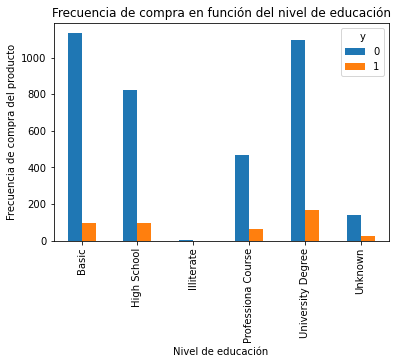

In [16]:
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")
#Quienes mas compran podemos ver un tipo de persona que mas compra son las universitarias. 
#podemos ver que el nivel de educacion, es un buen predictor, si influye en si compra o no. 


In [17]:
table = pd.crosstab(data.marital, data.y)
table

y,0,1
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


In [18]:
table.div(table.sum(1).astype(float), axis=0) #con table.sum(1) lo hacemos por filas, astype es para que pueda hacer la division 
#correctamente y el resultado lo haga por columnas, axis=0.

y,0,1
marital,,
divorced,0.903587,0.096413
married,0.899562,0.100438
single,0.865568,0.134432
unknown,0.909091,0.090909


Text(0, 0.5, 'Proporción de clientes')

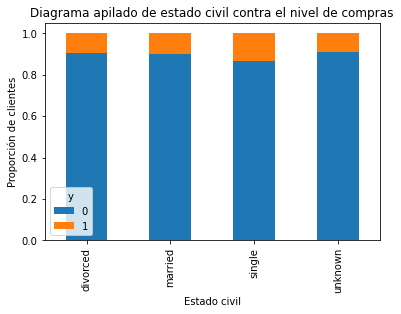

In [19]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

In [20]:
table= pd.crosstab(data.day_of_week, data.y)
table

y,0,1
day_of_week,,
fri,685,83
mon,757,98
thu,764,96
tue,750,91
wed,712,83


In [21]:
table.div(table.sum(1).astype(float), axis=0)

y,0,1
day_of_week,,
fri,0.891927,0.108073
mon,0.885380,0.114620
thu,0.888372,0.111628
tue,0.891795,0.108205
wed,0.895597,0.104403


Text(0, 0.5, 'Frecuencia de compra del producto')

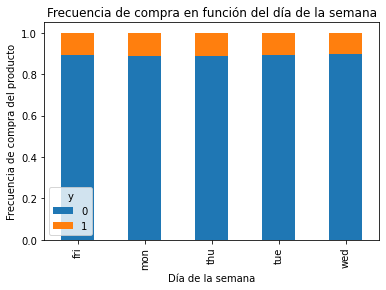

In [23]:
%matplotlib inline
table= pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")
#Tampoco vemos que tampoco hay mucha influencia en si alguien compra o no, respecto a cierto dia de la semana, todos los dias 
#practicamente se compra igual. 

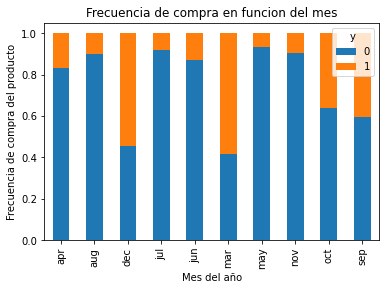

In [24]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Frecuencia de compra en funcion del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")
print() 
#Podemos ver que el mes, si podria ser un buen predictor. 

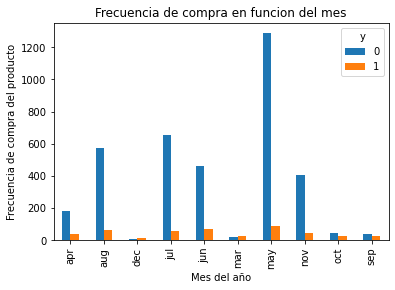

In [25]:
table = pd.crosstab(data.month, data.y)
table.plot(kind = "bar", stacked = False)
plt.title("Frecuencia de compra en funcion del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")
print() 
#Vemos que mucha gente, rechaza los productos en mayo. esto es algo bastante importante. 

Text(0, 0.5, 'Cliente')

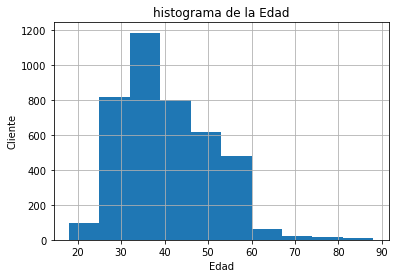

In [26]:
data.age.hist()
plt.title("histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")
#Tenemos la distribucion de la edad, la mayoria de la gente esta entre los 30 y 40. 
#Podemos pensar que la gente que tiene mas de 60, ya no piensa en invertir, piensa probablemente en la jubilacion, 
#menos de 25 tampoco, porque la mayoria de las personas no tienen dinero. 

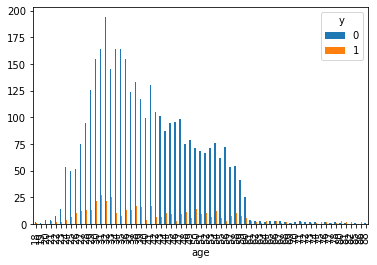

In [27]:
#Si queremos hacer una tabla cruzada y pintar un bar. 
pd.crosstab(data.age, data.y).plot(kind = "bar")
print()

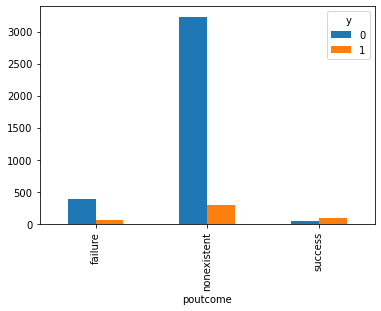

In [28]:
pd.crosstab(data.poutcome, data.y).plot(kind = "bar")
print()
#Podemos checar que la gente que ha fracasado tienen mas tendencia a decir que no.
#si alguien ha tenido una mala experiencia en bolsa, no va a repeterir, aunque algunos dicen que si. 
#esta variable tambien es bueno para decidir si alguien va a llevar acabo una inversion. 



## Conversión de las variables categóricas en variables dummy. 

Hay muchas variables categoricas en el dataframe, las convertiremos a variables dummy. 
lo idea es crear un array de las variables categoricas a dummies, lo haremos de manera automatica con un bucle for. 

In [39]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
print(data)
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

      age          job  marital          education default  housing     loan  \
0      30  blue-collar  married              Basic      no      yes       no   
1      39     services   single        High School      no       no       no   
2      25     services  married        High School      no      yes       no   
3      38     services  married              Basic      no  unknown  unknown   
4      47       admin.  married  University Degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married              Basic      no      yes      yes   
4115   39       admin.  married        High School      no      yes       no   
4116   27      student   single        High School      no       no       no   
4117   58       admin.  married        High School      no       no       no   
4118   34   management   single        High School      no      yes       no   

        contact month day_of_week  ... 

ValueError: columns overlap but no suffix specified: Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

In [40]:
#Quitamos las columnas originales. 
data_vars = data.columns.values.tolist()

In [41]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [42]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professiona Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'da

In [43]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

In [54]:
X = bank_data[cols]
Y = bank_data["y"] #Seleccion de variables, las variable predictoras y la variable a predecir. 

### Implementación del modelo en Python con scikit-learn
Esto lo haremos para ajustar el modelo y ver exactamente el resultado asi como los estadisticos a los que estamos acostumbrados en los modelos.

In [55]:
from sklearn import linear_model

In [56]:
logit_model = linear_model.LogisticRegression() #Primero crea el modelo y luego lo ajusta. 
logit_model.fit(X,Y)

LogisticRegression()

In [57]:
logit_model.score(X,Y) #Factor R2. cuanto mayor es. es mejor nuestra prediccion. 
#Nos da uno muy elevado, significa que es bastante alto en contraste con cualquier otro modelo que podemos crear. 

0.8958485069191552

In [59]:
1-Y.mean() 

0.8905074047098811

In [60]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_)))) #podemos crear un df apartir de hacer un zip de las columnas de x 
#con los valores que nos ha devuelto el modelo. 
#Estos son los valores que acompañan a dichas variables. 
#dichos valores tambien indican los cambios en escala logaritmica, por cada unidad de cambio de la variable. 
#ejemplo, si la variable previous aumenta en una unidad, el cociente de probas, el logaritmo del cociente,  se incrementara en medio punto
#y por lo tanto la probabilidad de compra incrementara de forma acorde. 


,0,1
0,previous,[0.5362541179381434]
1,euribor3m,[-0.544367039799783]
2,job_blue-collar,[-0.3533138743493321]
3,job_retired,[0.36165159081062676]
4,month_aug,[0.6292588895074614]
5,month_dec,[1.1943974572126674]
6,month_jul,[0.9630554140674591]
7,month_jun,[1.056689705647312]
8,month_mar,[1.6386680234606803]
9,month_nov,[0.4577084191063514]


## Validación del modelo 
## El modelo anterior esta hecho con todo un conjunto de datos, lo mas normal es la division en conjunto de validación y de entrenamiento, para evaluar la calidad del modelo. 

In [61]:
from sklearn.model_selection import train_test_split
#Metodo muy facil, nosotros le suplementamos la X y Y respectiva y esto lo divide solo, hace una asignacion multiple. 

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)
#Tenemos dos variables para entrenar y dos para validar, 

In [63]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train) #Hemos creado el modelo. la ecuacion que sustenta el modelo, lleva acabo las predicciones de las probas.

LogisticRegression()

In [64]:
from IPython.display import display, Math, Latex

In [65]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))
#Si la proba es mas pequeño se considerar como 0, sino como 1. 

<IPython.core.display.Math object>

In [66]:
probs = lm.predict_proba(X_test) #Para predecir las probas del conjunto de test. 
#Nos dara la proba estandar, nos dara la proba de estar seguros tanto de una respuesta positiva como negativa 
#de un conjunto de datos. 

In [67]:
probs
#la primera columna es la proba, como de seguro estoy de lo que digo
#la segunda da la proba de el valor de salida, la compra o la no compra. 
#si esa superior de lado derecho es superior a 0.5 entonces la observacion se catalogica como 1 o de "compra"
#herramientas fundamentales para poder decidir. 

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [68]:
prediction = lm.predict(X_test)

In [69]:
prediction #array que contiene 0 o 1. menor a 0.5 lo toma como 0. 

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [71]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [72]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [73]:
390/len(prob_df)*100 #Hemos incrementando un poco la compra de compradores. a un 31%

31.55339805825243

In [74]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,915
1,321


In [75]:
331/len(prob_df)*100

26.779935275080906

In [76]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [77]:
732/len(prob_df)*100

59.22330097087378

In [78]:
from sklearn import metrics

In [79]:
metrics.accuracy_score(Y_test, prediction) #en el 90% de los casos coincide, en cuantos casos acertamos. 

0.901294498381877